# Achievement 6.3 - Geospatial visualization in Python

### This part of the project focused on generation geospatial visualizations so that we can actually the geographical location of each listing. This will add context to the additional values are we will start to develop an understanding of how geography impacts variables such as price, capacity size, review scores, etc.

### Sections:

- 1: Library Importing & file Importing (CSV, GeoJSON)
- 2: Data Checks (Though main wrangling / consistency steps actioned in prior exercise)
- 3: Choropleth Maps
- 4: Final Points

#### Section 1:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
city_map = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Data\neighbourhoods.geojson'

In [4]:
path = r'C:\Users\mojos\Documents\Career Foundry Course\Data Immersion\Section 6\AirBnB Amsterdam Project\AirBnB Data'

In [5]:
listings = pd.read_csv(os.path.join(path, 'prepared','listings_sub1000.csv'),index_col = 0)

#### Section 2:

In [6]:
listings.head()

,id,name,summary,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,rated,pricing_tier,group_size,groupsize_pricing_combined
0,2818,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,3159,t,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,...,248,97.0,9.0,10.0,t,2.10,True,Low,Small,Small Low
1,3209,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,3806,f,Westerpark,52.390225,4.873924,Apartment,Entire home/apt,...,42,96.0,9.0,9.0,f,1.03,True,Mid-High-End,Large,Large Mid-High-End
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",59484,f,Centrum-Oost,52.365087,4.893541,Townhouse,Entire home/apt,...,233,87.0,10.0,9.0,f,2.18,True,Low,Small,Small Low
3,25428,Lovely apt in City Centre (Jordaan),NaN,56142,f,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,...,1,100.0,10.0,10.0,f,0.09,True,Mid-Low-End,Medium,Medium Mid-Low-End
4,27886,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,97647,t,Centrum-West,52.386727,4.892078,Houseboat,Private room,...,171,99.0,10.0,10.0,t,2.03,True,Mid-High-End,Small,Small Mid-High-End


In [7]:
listings.shape

(17341, 30)

#### For the this Geospatial Analysis we'll be reviewing pricing in each neighbourhood in the form of a choropleth map, to try and find cheaper regions.

#### Due to the data source, the GeoJSON file was already provided and the formatting of each neighbourhood variable has already been cleansed to match.

#### We already have done some initial analysis on the price deviations between the different neighbourhoods, finding average price overall, and per property type in each neighbourhood. The prior formatting of combined crosstabs is harder to make quick inferences on however, so plotting these datails in a choropleth would benefit the analysis due to it's legibilty,

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

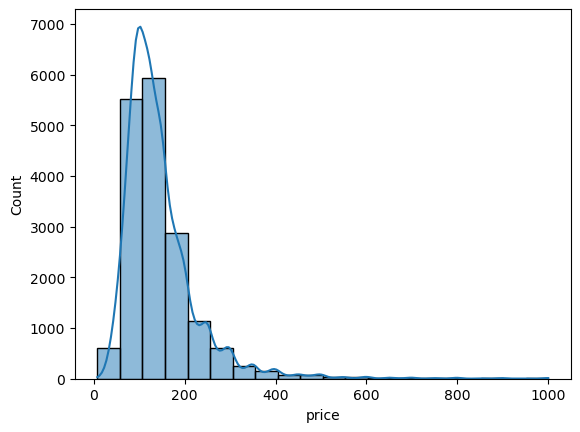

In [8]:
sns.histplot(listings['price'], bins=20, kde = True)

#### In the prior sections we had limited the data to prices under the 1000 Euro range. Whilst there is a right skewed distribution - I'm hesitant to reduce our dataset further by putting an additional limit at around the 400 Euro mark (which represents 2 standard deviations from the mean) because after a quick review (in 2024) for Amsterdam properties, there are plenty of listings within the 400-900 Range that are legitimate values.

In [9]:
#creating a subset of the data so we only use the necessary values for the choropleth:
#406 represents two st. deviations away from the mean
listings2 = listings[listings['price']>=406]
listings3 = listings[listings['price']<=406]

In [10]:
# Reviewing the data subset for values above 406, to see how much of the data set they represent 
listings2.shape

(268, 30)

In [11]:
listings3.shape

(17073, 30)

### Section 3:

In [12]:
#Creating an itial datafram of only two variables -  from original import rather than subset - to streamline viz generation
data_to_plot = listings[['neighbourhood_cleansed','price']]
data_to_plot.head()

,neighbourhood_cleansed,price
0,Oostelijk Havengebied - Indische Buurt,59.0
1,Westerpark,160.0
2,Centrum-Oost,80.0
3,Centrum-West,125.0
4,Centrum-West,150.0


In [13]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [52.36, 4.9], zoom_start = 11)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = city_map, 
    data = data_to_plot,
    columns = ['neighbourhood_cleansed', 'price'],
    key_on = 'feature.properties.neighbourhood', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.8,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [31]:
map.save('neighbourhood_price1.html')

In [14]:
#This subset represents the same variables, but only from the data where price is under 406.
#This is just to check whether those extra 200 values really alter the output.
data_to_plot2 = listings3[['neighbourhood_cleansed','price']]
data_to_plot2.head()

,neighbourhood_cleansed,price
0,Oostelijk Havengebied - Indische Buurt,59.0
1,Westerpark,160.0
2,Centrum-Oost,80.0
3,Centrum-West,125.0
4,Centrum-West,150.0


In [15]:
data_to_plot2['neighbourhood_cleansed'].value_counts(dropna=False)

neighbourhood_cleansed
De Baarsjes - Oud-West                    3075
De Pijp - Rivierenbuurt                   2122
Centrum-West                              1965
Centrum-Oost                              1444
Westerpark                                1307
Zuid                                      1168
Oud-Oost                                  1135
Bos en Lommer                              997
Oostelijk Havengebied - Indische Buurt     840
Oud-Noord                                  483
Watergraafsmeer                            452
IJburg - Zeeburgereiland                   370
Slotervaart                                335
Noord-West                                 272
Noord-Oost                                 211
Buitenveldert - Zuidas                     197
Geuzenveld - Slotermeer                    172
Osdorp                                     140
De Aker - Nieuw Sloten                     111
Gaasperdam - Driemond                      109
Bijlmer-Centrum                      

In [16]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [52.36, 4.9], zoom_start = 11)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = city_map, 
    data = data_to_plot2,
    columns = ['neighbourhood_cleansed', 'price'],
    key_on = 'feature.properties.neighbourhood', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.8,
    legend_name = "rating").add_to(map2)
folium.LayerControl().add_to(map2)

map2

In [29]:
map2.save('neighbourhood_price2.html')

#### No legible differences between using the main listings dataframe which we had imported originally based on prior wrangling cleanup steps, compared with our reduced (sub400 Euro DF - 230 values removed, but imperceptible changes in colour grading).

#### As someone who has never visited Amsterdam and has little bearing on it's geography prior to this exercise, the choropleth map has proved invaluable. Apart from the 'centrum' prefix, which is somewhat self-explanatory, the rest of the neighbourhoods don't have naming conventions which give away their geographic location so seeing them in a list view (or even in bar chart perhaps) doesn't really inspire much further thought.

#### Generally speaking, Tourist attractions are located in centrum (binnestad, which is on the river) so it's interesting to see how pricing changes as we move further away from the city center, yet some neighbourhoods manage to retain their higher prices, despite a visible distance (or the alternative, how some sections immediately adjacent to their center are extremely cheap, e.g zuid directly south of the center) - We were previously relying on the location score to inform us on which areas may be 'best' to stay. The location rating was a subjective rating by customers, and tells us not only distance from metripolitan hub, but also what local amenities there are. What will be an interesting point of research, now we know the distances from city center will be to review neighbourhood score again to see whether our perspective on the scores has changed.

C:\Users\mojos\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='review_scores_location', ylabel='Count'>

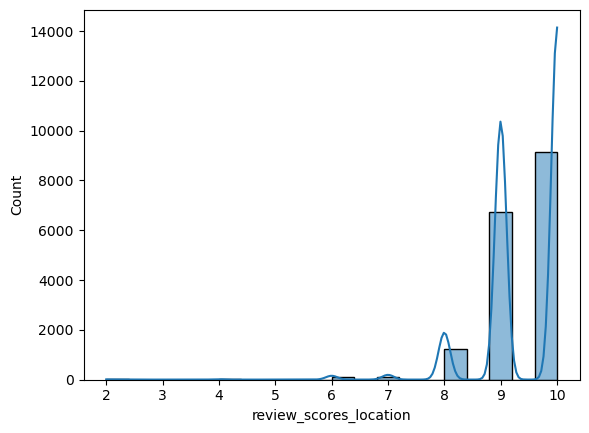

In [17]:
sns.histplot(listings['review_scores_location'], bins=20, kde = True)

In [18]:
listings4 = listings[listings['review_scores_location']<8]
listings4.shape

(238, 30)

In [19]:
listings5 = listings[listings['review_scores_location']>=8]
listings5.shape

(17103, 30)

In [20]:
data_to_plot3 = listings5[['neighbourhood_cleansed','review_scores_location']]
data_to_plot.head()

,neighbourhood_cleansed,price
0,Oostelijk Havengebied - Indische Buurt,59.0
1,Westerpark,160.0
2,Centrum-Oost,80.0
3,Centrum-West,125.0
4,Centrum-West,150.0


In [21]:
# Setup a folium map at a high-level zoom
map3 = folium.Map(location = [52.36, 4.9], zoom_start = 11)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = city_map, 
    data = data_to_plot3,
    columns = ['neighbourhood_cleansed', 'review_scores_location'],
    key_on = 'feature.properties.neighbourhood', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.8,
    legend_name = "rating").add_to(map3)
folium.LayerControl().add_to(map3)

map3

In [27]:
map3.save('neighbourhood_loc_rating1.html')

### As a final point of comparison, I've created an average location rating from a smaller crosstab in a prior exercise and I intend to double check the output of that file against the viz generated about.

In [22]:
neighbourhood =  pd.read_csv(os.path.join(path,'Prepared','Neighbourhood_averages.csv'))
neighbourhood.head()

,neighbourhood_cleansed,Entire home count,Entire home Price,Private room count,Private room price,Shared room count,Shared room price,review_scores_location,review_scores_rating
0,Bijlmer-Centrum,45,126.088889,43,65.511628,0,NaN,8.693182,92.818182
1,Bijlmer-Oost,34,141.294118,47,62.680851,1,100.0,8.451220,92.743902
2,Bos en Lommer,829,122.607961,166,79.078313,5,79.6,9.010000,95.359000
3,Buitenveldert - Zuidas,151,154.324503,48,75.500000,1,80.0,8.865000,92.600000
4,Centrum-Oost,1116,196.523297,369,118.745257,6,134.0,9.753186,94.611670


In [23]:
data_to_plot4 = neighbourhood[['neighbourhood_cleansed','review_scores_location']]
data_to_plot4

,neighbourhood_cleansed,review_scores_location
0,Bijlmer-Centrum,8.693182
1,Bijlmer-Oost,8.451220
2,Bos en Lommer,9.010000
3,Buitenveldert - Zuidas,8.865000
4,Centrum-Oost,9.753186
5,Centrum-West,9.896787
6,De Aker - Nieuw Sloten,8.945946
7,De Baarsjes - Oud-West,9.476744
8,De Pijp - Rivierenbuurt,9.619981
9,Gaasperdam - Driemond,8.724771


In [24]:
# Setup a folium map at a high-level zoom
map4 = folium.Map(location = [52.36, 4.9], zoom_start = 11)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = city_map, 
    data = data_to_plot4,
    columns = ['neighbourhood_cleansed', 'review_scores_location'],
    key_on = 'feature.properties.neighbourhood', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.5, line_opacity=0.8,
    legend_name = "rating").add_to(map4)
folium.LayerControl().add_to(map4)

map4

In [28]:
map4.save('neighbourhood_loc_rating2.html')

#### because of the simplicity of the values (comapred to the range available in the main file) the choropleth map generated using average neighbourhood scores, rather than each individual listings, the relationship between location score and proximity to the cultural city center because much more evident. The colour grading in the viz allows for a uch more legible transition between regions, compared to the prior map.

### Section 4:

#### refering back to the questions outlined in the original ex 6.1, We have additional context for what the values mean by understanding their proximity to the center of the region being discussed.

#### One of the outlined questions was 'how does neighbourhood and property impact price? - We can now clearly see how geography impacts price, and how geography can influence location score. We dont currently have data that represents quantity of local shops or transit options etc. But atleast using proximity to cultural center as a focal point, the data speaks for itself.

#### the same visualization also starts to answer our question regarding variables which impact overal customer satisfaction, but again, that's a multifaceted issue which will take further revew in subsequent exercises.